In [11]:
import pandas as pd
import numpy as np
from datetime import datetime as dtm
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
%matplotlib inline
import src.sk_ml; reload(src.sk_ml)
from src.sk_ml import *

In [2]:

iris = load_iris()
data1 = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

x = data1.iloc[:,:3]
y = data1.target

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=0)

In [3]:
models = sk_models(stoplist=())
params = grid_cv_default_params()

In [6]:
df_cv_res = grid_cv_models(train_x, train_y, models, params, path='data/cross_validation/test', redo=True)

2017-05-28 21:30:24.541000 CVing: kind = reg, model = DTreg



KeyboardInterrupt



In [4]:
loaded_df_cv_res = grid_cv_models(train_x, train_y, models, params, path='data/cross_validation/test', save_res=True, verbose=True)

fitting model reg DTreg
fitting model reg linearSVR
fitting model reg ADAreg
fitting model reg MLPreg
fitting model reg BAGreg
fitting model reg SVR
fitting model reg lasso
fitting model reg ridge
fitting model reg RFreg
fitting model reg ols
fitting model reg GDBreg
fitting model cls logistics
fitting model cls DTcls
fitting model cls SVM
fitting model cls linearSVM
fitting model cls MLPcls
fitting model cls ADAcls
fitting model cls GDBcls
fitting model cls GNBcls
fitting model cls RFcls
fitting model cls BAGcls
loaded existing cv-ed best parameters


# feature importance

In [5]:
rf = loaded_df_cv_res.loc[('reg','RFreg')].best_model
dt = loaded_df_cv_res.loc[('reg','DTreg')].best_model

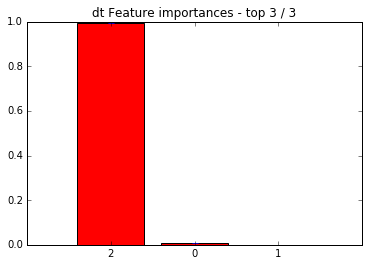

,importance,label,std
2,0.994048,2,0.0
0,0.005952,0,0.0
1,0.000000,1,0.0


In [13]:
show_important_features(dt, 'dt')

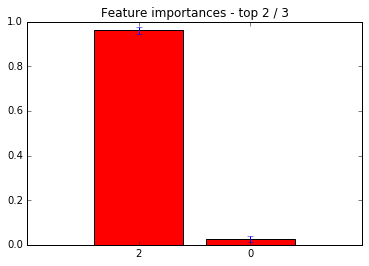

,importance,label,std
2,0.960790,2,0.014747
0,0.025641,0,0.015131


In [9]:
show_important_features(rf,top=2)

# prediction of some models such as MLPreg and LinearSVR is random

In [7]:
df_evl1 = evaluate_grid_cv(df_cv_res, train_x, train_y, test_x, test_y, evaluator_scalable_cls, path='data/cross_validation/', )
df_evl2 = evaluate_grid_cv(df_cv_res, train_x, train_y, test_x, test_y, evaluator_scalable_cls)

D:\Program Files\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# loaded parameters of sklearn model works

In [7]:
df_evl_loaded = evaluate_grid_cv(loaded_df_cv_res, train_x, train_y, test_x, test_y, evaluator_scalable_cls)

D:\Program Files\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [8]:
df_evl_loaded

test_acc   test_f1  test_mse  train_acc  train_f1  train_mse
reg BAGreg     1.000000  1.000000  0.014087   1.000000  1.000000   0.008998
cls GDBcls     1.000000  1.000000  0.000000   0.975000  0.974884   0.025000
reg SVR        1.000000  1.000000  0.045988   0.975000  0.974884   0.033624
    RFreg      1.000000  1.000000  0.010920   1.000000  1.000000   0.008517
cls ADAcls     0.966667  0.967282  0.033333   0.950000  0.949658   0.050000
    RFcls      0.966667  0.967282  0.033333   1.000000  1.000000   0.000000
reg GDBreg     0.966667  0.967282  0.026397   1.000000  1.000000   0.001134
    DTreg      0.966667  0.967282  0.022759   0.950000  0.949390   0.032281
    ols        0.966667  0.965769  0.070981   0.975000  0.974884   0.057479
    linearSVR  0.966667  0.965769  0.071488   0.975000  0.974884   0.057630
    ridge      0.966667  0.965769  0.071311   0.966667  0.966439   0.057639
cls logistics  0.966667  0.965769  0.033333   0.966667  0.966574   0.033333
    SVM        0.966667  0.965769  0.033333   0.958333  0.958282   0.041667
    MLPcls     0.966667  0.965769  0.033333   0.966667  0.966667   0.033333
    BAGcls     0.933333  0.933333  0.066667   1.000000  1.000000   0.000000
    DTcls      0.933333  0.933333  0.066667   1.000000  1.000000   0.000000
reg ADAreg     0.933333  0.933333  0.027548   0.950000  0.949658   0.031083
cls GNBcls     0.866667  0.866667  0.133333   0.900000  0.900153   0.100000
    linearSVM  0.700000  0.684874  0.300000   0.900000  0.896323   0.100000
reg MLPreg     0.366667  0.336825  0.296361   0.533333  0.480135   0.218478
    lasso      0.433333  0.262016  0.320893   0.308333  0.145329   0.379992

In [14]:
a= (df_evl1.sort_index()/df_evl2.sort_index()).mean(axis=1)
a = a.to_frame()
b=(df_evl_loaded.sort_index()/df_evl1.sort_index()).mean(axis=1)
a[1] = b
a.columns = ['two prediction', 'load/train']

In [17]:
a.sort_values('two prediction')

two prediction  load/train
cls RFcls            0.828571    1.000000
    BAGcls           0.914418    1.186084
    DTcls            0.948771    0.999082
reg BAGreg           0.966015    1.040742
    GDBreg           0.968744    1.048633
    linearSVR        0.999144    1.000669
cls ADAcls           1.000000    1.000000
reg lasso            1.000000    1.000000
    SVR              1.000000    1.000000
    DTreg            1.000000    1.000000
    ridge            1.000000    1.000000
cls logistics        1.000000    1.000000
    SVM              1.000000    1.000000
    GNBcls           1.000000    1.000000
    GDBcls           1.000000    1.000000
reg ols              1.000000    1.000000
    MLPreg           1.004002    0.992762
    ADAreg           1.030979    0.965157
cls MLPcls           1.052712    0.961202
reg RFreg            1.065469    1.047352
cls linearSVM        1.497352    1.135433

# Vis result

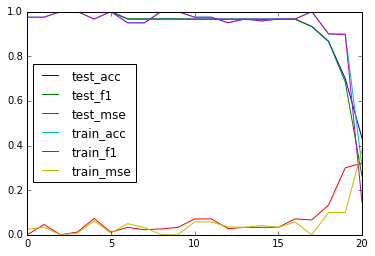

In [12]:
vis_evaluation('data/cross_validation/', 5)

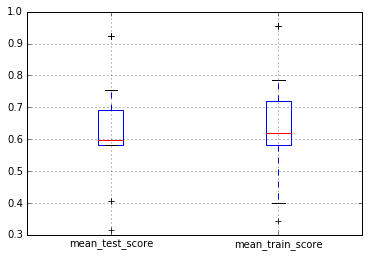

In [11]:
vis_grid_cv_one_model('data/cross_validation/cv_5_model_ADAcls.csv')